### SQL Magic
--------------
- install ipython-sql 

In [1]:
!pip install --user ipython-sql

  Obtaining dependency information for ipython-sql from https://files.pythonhosted.org/packages/30/8f/9e50fa53ffc371483f9d1b90c1175b706d28a2e978e90a8894035af01905/ipython_sql-0.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for prettytable from https://files.pythonhosted.org/packages/d9/5a/bfdc26c0e19156992b1dc9de47f0b2e8992fe43db9981d814f860bdce2b3/prettytable-3.11.0-py3-none-any.whl.metadata
  Obtaining dependency information for sqlalchemy>=2.0 from https://files.pythonhosted.org/packages/bb/8c/4548ae42b4ab7f3fe9f1aeb4b1f28ea795485ca44840cb0f3f57aa8ecfcc/SQLAlchemy-2.0.32-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for sqlparse from https://files.pythonhosted.org/packages/5d/a5/b2860373aa8de1e626b2bdfdd6df4355f0565b47e51f7d0c54fe70faf8fe/sqlparse-0.5.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.1 MB 1.7 MB/s eta 0:00:02
   --- ------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


- Enable the SQL magic in jupyter notebook using below statement
- `%load_ext sql`

### Using SQL Magic with SQLite Database
- import sqlit3 == %load_ext sql
- conn = sqlite3.connect('HR.db') == %sql sqlite:///HR.db

In [2]:
%load_ext sql
%sql sqlite:///HR.db

In [4]:
%sql SELECT name FROM sqlite_master WHERE type='table';


 * sqlite:///HR.db
Done.


[]

In [5]:
%%sql
CREATE TABLE students (
    id INTEGER PRIMARY KEY,
    ename TEXT NOT NULL,
    city TEXT
);


 * sqlite:///HR.db
Done.


[]

In [6]:
%%sql
SELECT name FROM sqlite_master WHERE type='table';


 * sqlite:///HR.db
Done.


[('students',)]

In [7]:
%%sql
INSERT INTO students (ename, city) VALUES ('kiran', 'mub');
INSERT INTO students (ename, city) VALUES ('hari', 'hyd');
INSERT INTO students (ename, city) VALUES ('madhu', 'hyd');
INSERT INTO students (ename, city) VALUES ('smith', 'delhi');
INSERT INTO students (ename, city) VALUES ('scott', 'mub');
INSERT INTO students (ename, city) VALUES ('allen', 'hyd');
INSERT INTO students (ename, city) VALUES ('soumya', 'channi');
INSERT INTO students (ename, city) VALUES ('johai', 'delhi');


 * sqlite:///HR.db
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [8]:
%%sql
SELECT * FROM students;


 * sqlite:///HR.db
Done.


[(1, 'kiran', 'mub'),
 (2, 'hari', 'hyd'),
 (3, 'madhu', 'hyd'),
 (4, 'smith', 'delhi'),
 (5, 'scott', 'mub'),
 (6, 'allen', 'hyd'),
 (7, 'soumya', 'channi'),
 (8, 'johai', 'delhi')]

In [9]:
%%sql
ALTER TABLE students RENAME TO employee;


 * sqlite:///HR.db
Done.


[]

#### tutorial link https://www.youtube.com/watch?v=186TuLumGSM&list=PLd3UqWTnYXOkwqytT5E_tF-71tIyf0esb&index=15

### 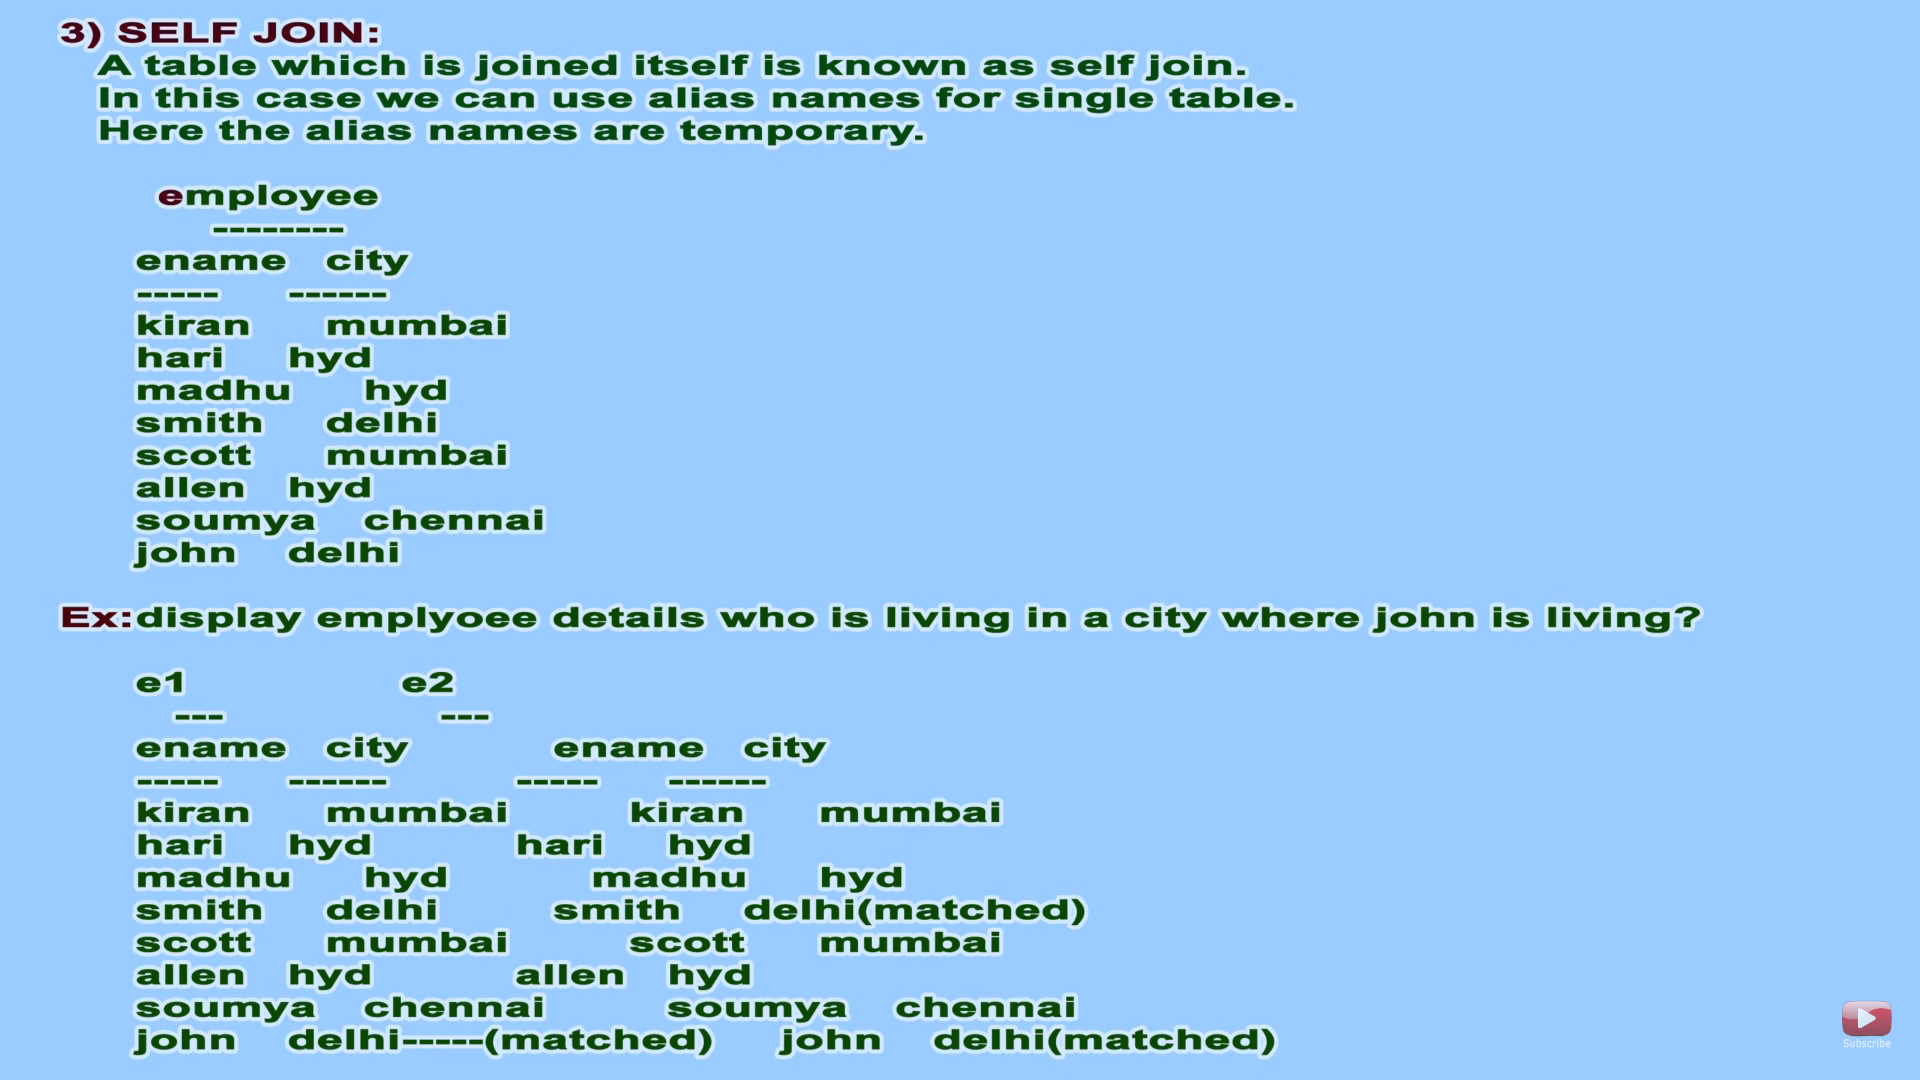

### 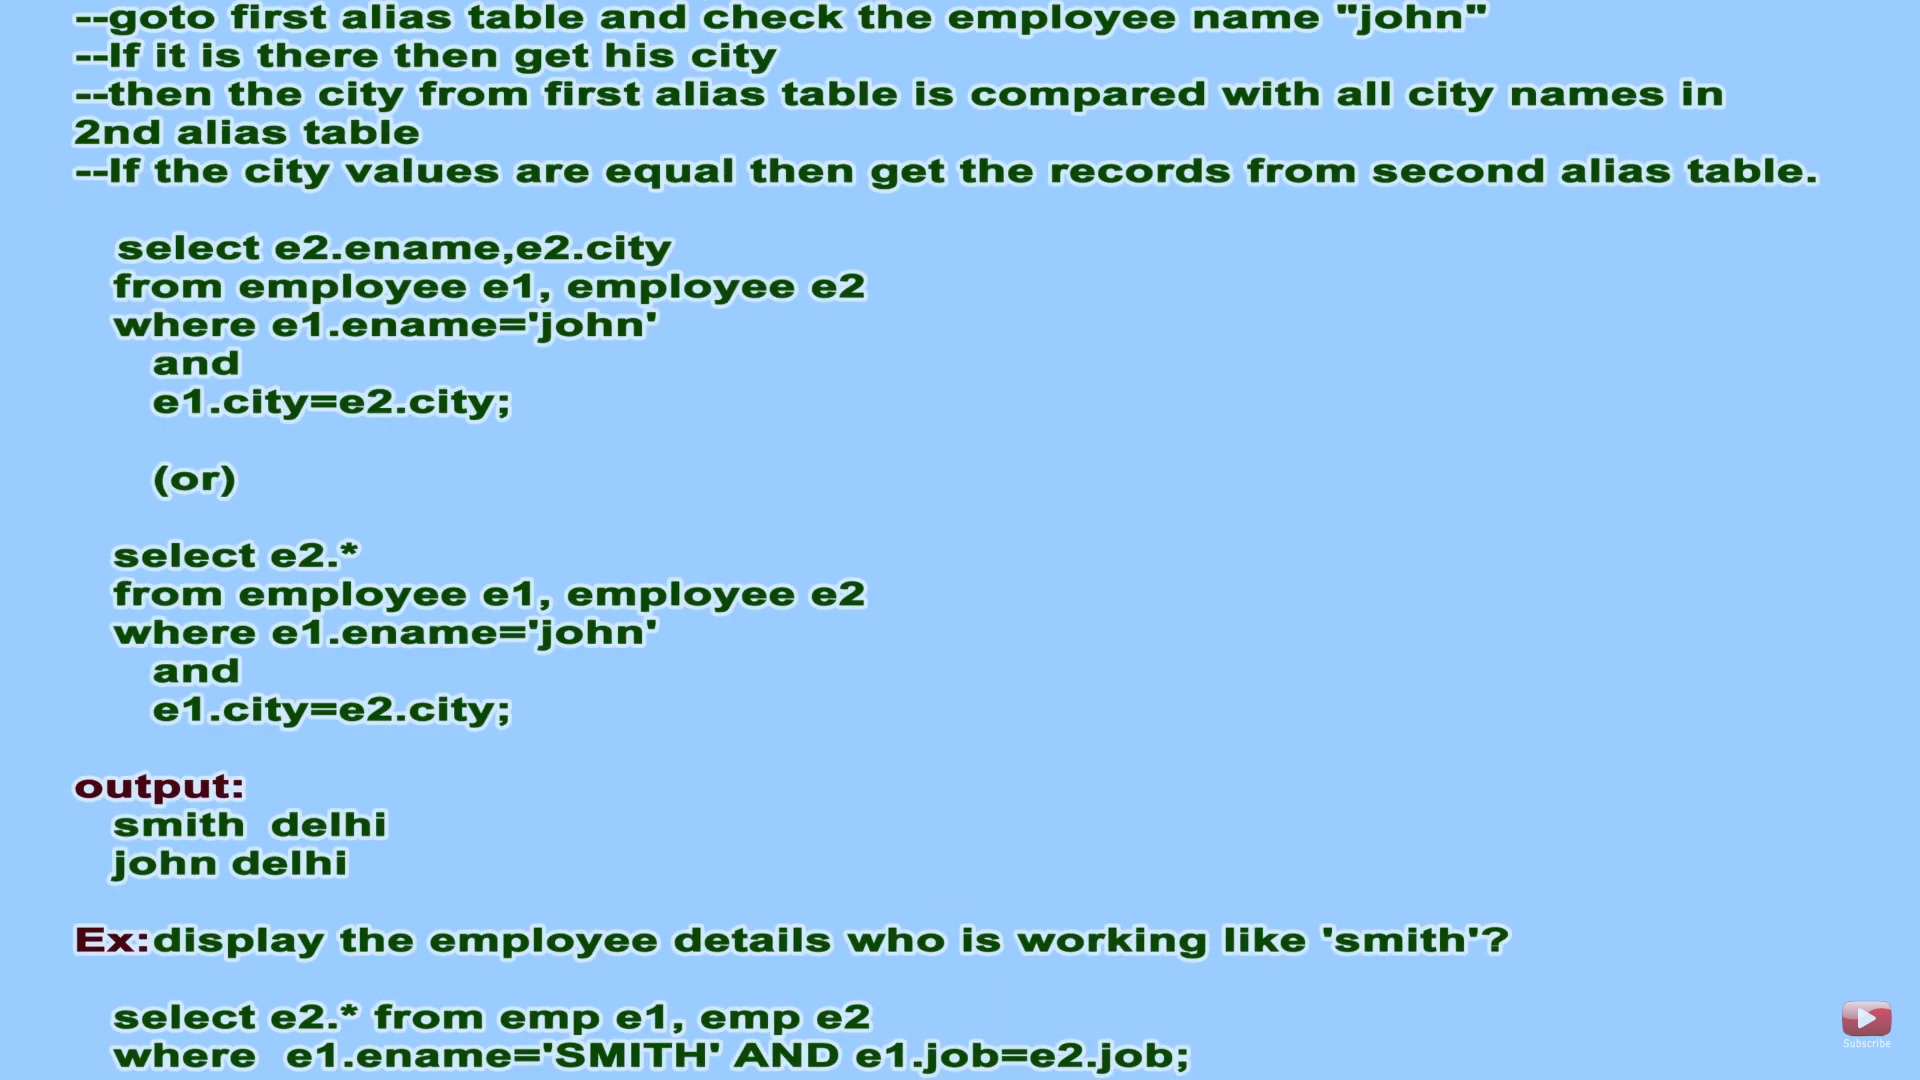

### 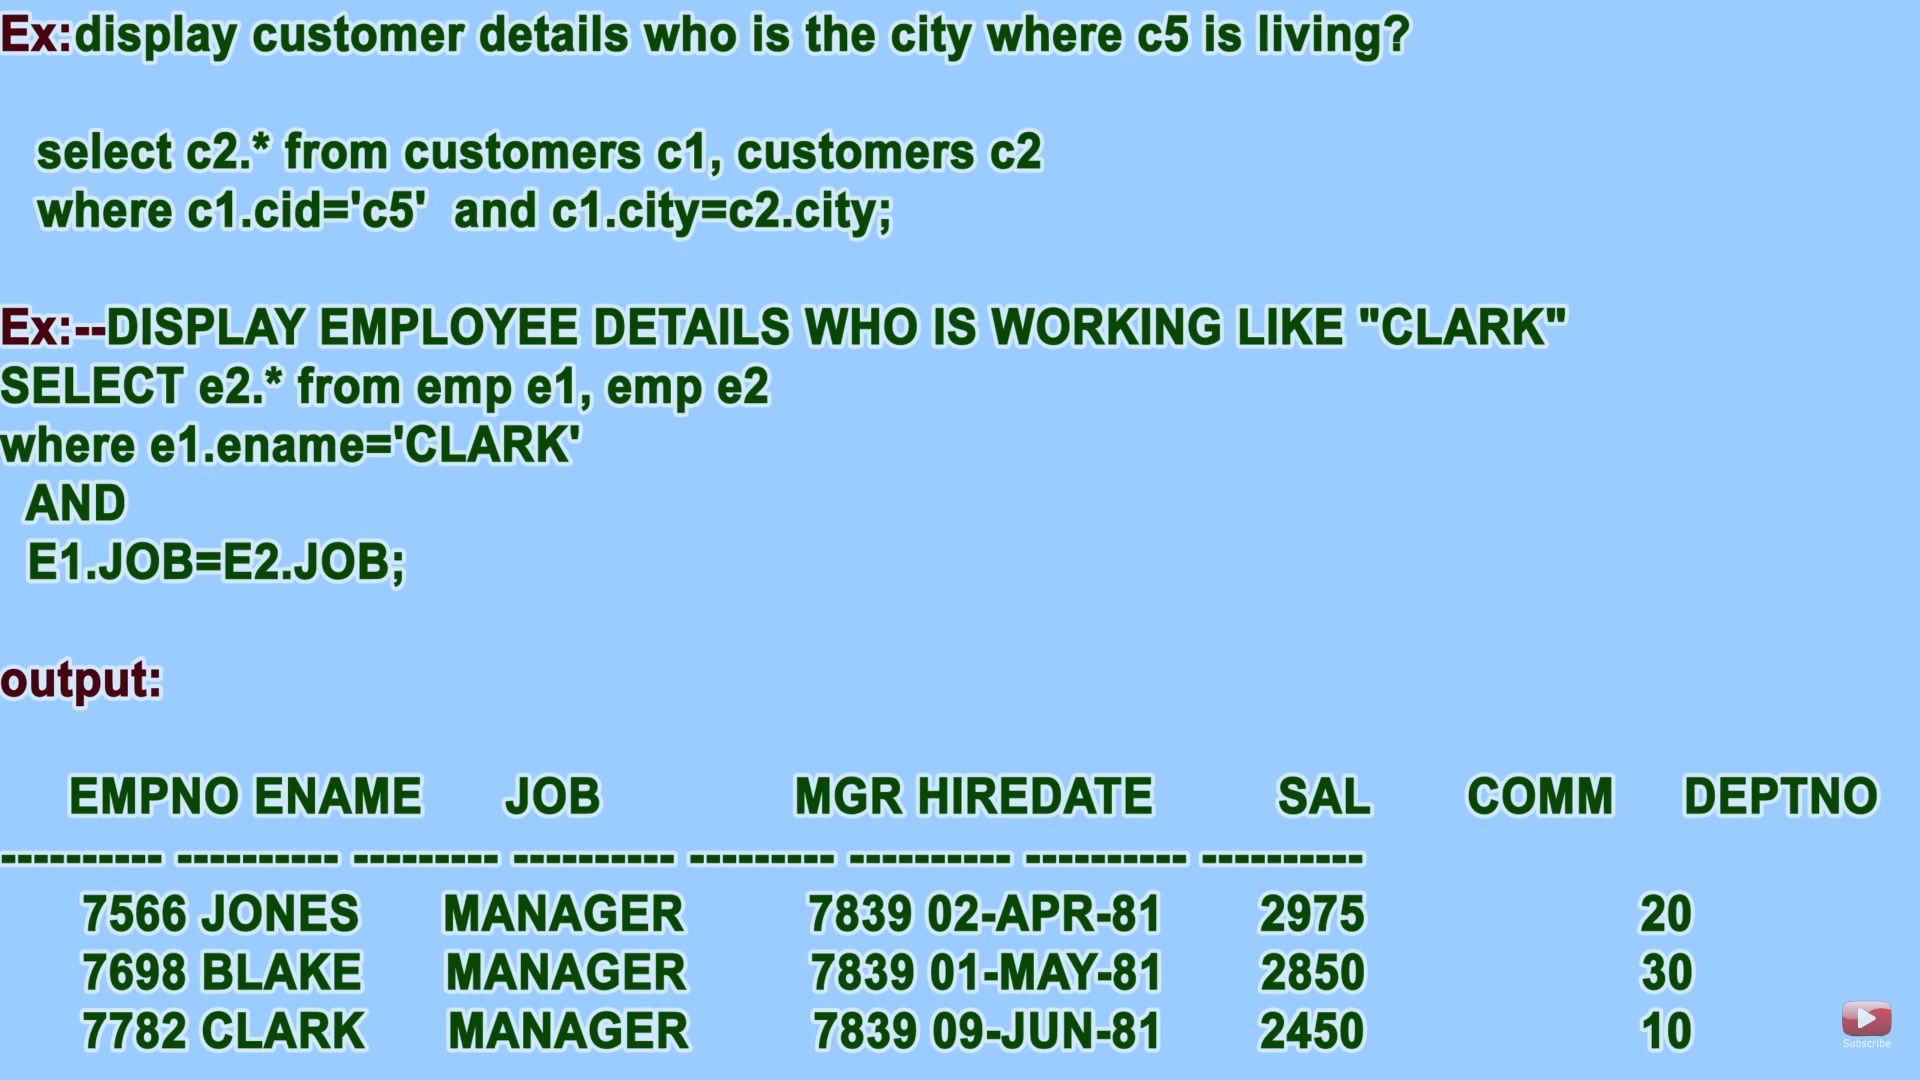

## SELF JOIN
-----------------
- A table which is joined itselff is known as self join.
- In this case we can use alias name from single table 
<br>
Here alias names are temporary

### Employee Table
------
| ename   | city | 
| ------- | ---- | 
| kiran | mub  | 
| hari | hyd  | 
| madhu | hyd  | 
| smith | delhi  | 
| scott | mub  | 
| allen | hyd  | 
| soumya | channi  | 
| johai | delhi  | 



### - Q1: Display employee details Who is living in a city where jhonne is living?
pic here

------
1. Goto first alias table and check the employee name "Jhone"
2. If it is there then get his city'
3. Then the city from first alias table is compared with all city names in 2nd alias table.
4. If the city values are equal then get the records from (records alias table)alias table

1. ANS<br>
    - `WHERE e1.ename = 'johai'
        AND
        e1.city = e2.city`
- or<br>
    - `SELECT e2.*`<br>
    `FROM employee e1,employee e2`<br>
    `WHERE e1.ename = 'Jhone`<br>
    `AND`<br>
    `e1.city = e2.city`<br>
o/p -> swith delhi, johan delhi

In [19]:
%%sql
SELECT e2.ename, e2.city
FROM employee e1, employee e2
WHERE e1.ename = 'johai'
AND e1.city = e2.city;

 * sqlite:///HR.db
Done.


[('johai', 'delhi'), ('smith', 'delhi')]

In [18]:
%%sql
SELECT e2.*
FROM employee e1,employee e2
WHERE e1.ename = 'johai'
AND
e1.city = e2.city;

 * sqlite:///HR.db
Done.


[(8, 'johai', 'delhi'), (4, 'smith', 'delhi')]

### Q2. Display employee details who is working like 'smit'?
----
`SELECT e2.* FROM emp  e1, emp  e2`<br>
`WHERE e1.ename = "SMIT" AND e1.job = e2.job` 

In [22]:
%%sql
CREATE TABLE emp (
    empno INTEGER PRIMARY KEY,
    ename TEXT NOT NULL,
    job TEXT,
    mgr INTEGER,
    hiredate TEXT,
    sal REAL,
    comm REAL,
    deptno INTEGER
);


 * sqlite:///HR.db
Done.


[]

In [23]:
%%sql
INSERT INTO emp (empno, ename, job, mgr, hiredate, sal, comm, deptno) 
VALUES (7566, 'clark', 'manager', 7839, '02-apr-81', 2975, NULL, 20);
INSERT INTO emp (empno, ename, job, mgr, hiredate, sal, comm, deptno) 
VALUES (7839, 'king', 'president', NULL, '17-nov-81', 5000, NULL, 10);
INSERT INTO emp (empno, ename, job, mgr, hiredate, sal, comm, deptno) 
VALUES (7782, 'ward', 'salesman', 7698, '28-sep-81', 1250, 500, 30);
INSERT INTO emp (empno, ename, job, mgr, hiredate, sal, comm, deptno) 
VALUES (7698, 'jones', 'manager', 7839, '09-dec-81', 2975, NULL, 30);
INSERT INTO emp (empno, ename, job, mgr, hiredate, sal, comm, deptno) 
VALUES (7788, 'scott', 'analyst', 7566, '19-apr-87', 3000, NULL, 20);
INSERT INTO emp (empno, ename, job, mgr, hiredate, sal, comm, deptno) 
VALUES (7844, 'turner', 'salesman', 7698, '08-sep-81', 1500, NULL, 30);
INSERT INTO emp (empno, ename, job, mgr, hiredate, sal, comm, deptno) 
VALUES (7876, 'adams', 'clerk', 7788, '23-may-87', 1100, NULL, 20);
INSERT INTO emp (empno, ename, job, mgr, hiredate, sal, comm, deptno) 
VALUES (7900, 'ford', 'analyst', 7566, '03-dec-81', 3000, NULL, 20);
INSERT INTO emp (empno, ename, job, mgr, hiredate, sal, comm, deptno) 
VALUES (7934, 'miller', 'clerk', 7782, '23-jan-82', 1300, NULL, 10);
INSERT INTO emp (empno, ename, job, mgr, hiredate, sal, comm, deptno) 
VALUES (7902, 'blake', 'clerk', 7698, '03-apr-81', 1600, NULL, 30);
INSERT INTO emp (empno, ename, job, mgr, hiredate, sal, comm, deptno) 
VALUES (7903, 'smith', 'manager', 7698, '03-jun-81', 2450, NULL, 10);

 * sqlite:///HR.db
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [26]:
%%sql
SELECT e2.* 
FROM emp  e1, emp  e2
WHERE e1.ename = "smith" AND e1.job = e2.job;

 * sqlite:///HR.db
Done.


[(7566, 'clark', 'manager', 7839, '02-apr-81', 2975.0, None, 20),
 (7698, 'jones', 'manager', 7839, '09-dec-81', 2975.0, None, 30),
 (7903, 'smith', 'manager', 7698, '03-jun-81', 2450.0, None, 10)]

###  Q3. Display customer details who is the city where c5 is living?
---------
`SELECT c2.* FROM Customers c1, customer c2`<br>
`WHERE c1.cid = 'c5' AND c1.city = c2.city;`

In [31]:
%%sql
SELECT c2.* FROM emp c1, emp c2
WHERE c1.empno = '7900' AND c1.deptno = c2.deptno;

 * sqlite:///HR.db
Done.


[(7566, 'clark', 'manager', 7839, '02-apr-81', 2975.0, None, 20),
 (7788, 'scott', 'analyst', 7566, '19-apr-87', 3000.0, None, 20),
 (7876, 'adams', 'clerk', 7788, '23-may-87', 1100.0, None, 20),
 (7900, 'ford', 'analyst', 7566, '03-dec-81', 3000.0, None, 20)]

In [32]:
%%sql
CREATE TABLE cust_dtls (
    cno TEXT PRIMARY KEY,
    cname TEXT NOT NULL,
    city TEXT,
    gender TEXT
);


 * sqlite:///HR.db
Done.


[]

In [34]:
%%sql
INSERT INTO cust_dtls (cno, cname, city, gender) VALUES ('cust-1', 'Anil', 'Texas', 'M');
INSERT INTO cust_dtls (cno, cname, city, gender) VALUES ('cust-2', 'Kiran', 'Chicago', 'M');
INSERT INTO cust_dtls (cno, cname, city, gender) VALUES ('cust-3', 'Vinod', 'Delhi', 'M');
INSERT INTO cust_dtls (cno, cname, city, gender) VALUES ('cust-4', 'Madhu', 'Delhi', 'M');
INSERT INTO cust_dtls (cno, cname, city, gender) VALUES ('cust-5', 'Rocky', 'Texas', 'M');
INSERT INTO cust_dtls (cno, cname, city, gender) VALUES ('cust-6', 'Ching Fu', 'Chicago', 'M');
INSERT INTO cust_dtls (cno, cname, city, gender) VALUES ('cust-7', 'Sonali', 'Delhi', 'F');


 * sqlite:///HR.db
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [35]:
%%sql
SELECT * FROM cust_dtls;


 * sqlite:///HR.db
Done.


[('cust-1', 'Anil', 'Texas', 'M'),
 ('cust-2', 'Kiran', 'Chicago', 'M'),
 ('cust-3', 'Vinod', 'Delhi', 'M'),
 ('cust-4', 'Madhu', 'Delhi', 'M'),
 ('cust-5', 'Rocky', 'Texas', 'M'),
 ('cust-6', 'Ching Fu', 'Chicago', 'M'),
 ('cust-7', 'Sonali', 'Delhi', 'F')]

### select list of records where sonli is living
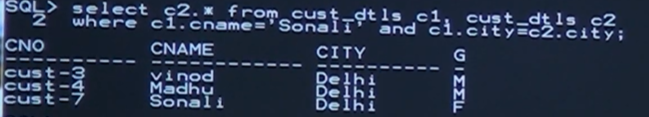

In [37]:
%%sql
SELECT c2.* from cust_dtls c1, cust_dtls c2
WHERE c1.cname="Sonali" AND c1.city = c2.city;

 * sqlite:///HR.db
Done.


[('cust-3', 'Vinod', 'Delhi', 'M'),
 ('cust-4', 'Madhu', 'Delhi', 'M'),
 ('cust-7', 'Sonali', 'Delhi', 'F')]

### if we try to get from first table then we get duplicate data
becouse first alias table match records is always fixed in second alias table match records will be change for each comparison
- thats why we always perfored table 2 for self
- for 2 lias name refering same physical table

#### Q4. Display employee details who is working like 'clark'
-------------
`SELECT e2.* FROM emp e1, emp e2`<br>
`WHERE e1.ename = 'Clark`<br>
`AND`<br>
`e1.job = e2.job`<br>

In [30]:
%%sql
SELECT e2.* FROM emp e1, emp e2
WHERE e1.ename = 'ford'
AND
e1.job = e2.job

 * sqlite:///HR.db
Done.


[(7900, 'ford', 'analyst', 7566, '03-dec-81', 3000.0, None, 20),
 (7788, 'scott', 'analyst', 7566, '19-apr-87', 3000.0, None, 20)]

- Alias name maintain a tempory copy of some table.
- Dont not select data from first table if you Select it will genrate dublicate data it is preferable to get data from second alias only
- A table is join itself is called `SELF JOIN`